# 'likes' Report - September 20, 2021
### Kaitlin Cochran
#### Data is from my personal Instagram account

### Task #1


Importing json and pandas libraries to be able to read in json objects and use the functions in the pandas library to help display data nicely.

In [6]:
import json
import pandas as pd

Importing 'likes' file from personal Instagram Data.

In [7]:
with open(r'C:\Users\kathm\Downloads\bmvcbr_20210902\likes\liked_posts.json') as j:
    data = json.load(j)

Looking at the raw json object:

In [ ]:
data

Getting the keys associated with this json object:

In [9]:
data.keys()

dict_keys(['likes_media_likes'])

Going one level deeper into the json object using the key 'likes_media_likes':

In [32]:
data['likes_media_likes'][0:5]

[{'title': 'nala_cat',
  'media_list_data': [],
  'string_list_data': [{'href': 'https://www.instagram.com/p/UIhiLXLCxq/',
    'value': 'ð\x9f\x91\x8d',
    'timestamp': 1357481351}]},
 {'title': 'superwoman__________',
  'media_list_data': [],
  'string_list_data': [{'href': 'https://www.instagram.com/p/UIjg_0lp6i/',
    'value': 'ð\x9f\x91\x8d',
    'timestamp': 1357481340}]},
 {'title': 'aquacat',
  'media_list_data': [],
  'string_list_data': [{'href': 'https://www.instagram.com/p/UIu-nevnFg/',
    'value': 'ð\x9f\x91\x8d',
    'timestamp': 1357481306}]},
 {'title': 'kico_roxas',
  'media_list_data': [],
  'string_list_data': [{'href': 'https://www.instagram.com/p/UIyJYEP-f0/',
    'value': 'ð\x9f\x91\x8d',
    'timestamp': 1357481298}]},
 {'title': 'kico_roxas',
  'media_list_data': [],
  'string_list_data': [{'href': 'https://www.instagram.com/p/UIy1ZFP-QC/',
    'value': 'ð\x9f\x91\x8d',
    'timestamp': 1357481295}]}]

Checking to see if list level has been reached yet:

In [11]:
type(data['likes_media_likes'])

list

### Task #2

Creating a DataFrame from the likes list using the key 'likes_media_likes':

In [12]:
likesList = pd.DataFrame(data['likes_media_likes'])

Viewing the first iteration of the data frame:

In [13]:
likesList

,title,media_list_data,string_list_data
0,nala_cat,[],[{'href': 'https://www.instagram.com/p/UIhiLXL...
1,superwoman__________,[],[{'href': 'https://www.instagram.com/p/UIjg_0l...
2,aquacat,[],[{'href': 'https://www.instagram.com/p/UIu-nev...
3,kico_roxas,[],[{'href': 'https://www.instagram.com/p/UIyJYEP...
4,kico_roxas,[],[{'href': 'https://www.instagram.com/p/UIy1ZFP...
...,...,...,...
10667,alexgaskarth,[],[{'href': 'https://www.instagram.com/p/BrxXRSp...
10668,starwars,[],[{'href': 'https://www.instagram.com/p/BrxdUOW...
10669,advice,[],[{'href': 'https://www.instagram.com/p/BrwceXI...
10670,jacob.mmii,[],[{'href': 'https://www.instagram.com/p/Brwc2y2...


Figuring out how to access the 'timestamp' portion of the json object:

In [14]:
data['likes_media_likes'][0]['string_list_data'][0]['timestamp']

1357481351

Creating a list of equal length of the 'timestamp' variables

In [15]:
timestampList = [x['string_list_data'][0]['timestamp'] for x in data['likes_media_likes']]

In [33]:
timestampList[0:5]

[1357481351, 1357481340, 1357481306, 1357481298, 1357481295]

Adding a column called "timestamp" to the current Data Frame.

In [17]:
likesList['timestamp'] = timestampList

In [18]:
likesList

,title,media_list_data,string_list_data,timestamp
0,nala_cat,[],[{'href': 'https://www.instagram.com/p/UIhiLXL...,1357481351
1,superwoman__________,[],[{'href': 'https://www.instagram.com/p/UIjg_0l...,1357481340
2,aquacat,[],[{'href': 'https://www.instagram.com/p/UIu-nev...,1357481306
3,kico_roxas,[],[{'href': 'https://www.instagram.com/p/UIyJYEP...,1357481298
4,kico_roxas,[],[{'href': 'https://www.instagram.com/p/UIy1ZFP...,1357481295
...,...,...,...,...
10667,alexgaskarth,[],[{'href': 'https://www.instagram.com/p/BrxXRSp...,1545664833
10668,starwars,[],[{'href': 'https://www.instagram.com/p/BrxdUOW...,1545664800
10669,advice,[],[{'href': 'https://www.instagram.com/p/BrwceXI...,1545634342
10670,jacob.mmii,[],[{'href': 'https://www.instagram.com/p/Brwc2y2...,1545634331


The fourth column appears to be another list of data, we can view it by:

In [19]:
data['likes_media_likes'][0]['string_list_data'][0]

{'href': 'https://www.instagram.com/p/UIhiLXLCxq/',
 'value': 'ð\x9f\x91\x8d',
 'timestamp': 1357481351}

This might be useful information that we could obtain the meaning of possibly though Instagram documentation.

Creating a column for each of the three values in this new list:

In [20]:
hrefList = [x['string_list_data'][0]['href'] for x in data['likes_media_likes']]

In [21]:
valueList = [x['string_list_data'][0]['value'] for x in data['likes_media_likes']]

In [34]:
hrefList[0:5]

['https://www.instagram.com/p/UIhiLXLCxq/',
 'https://www.instagram.com/p/UIjg_0lp6i/',
 'https://www.instagram.com/p/UIu-nevnFg/',
 'https://www.instagram.com/p/UIyJYEP-f0/',
 'https://www.instagram.com/p/UIy1ZFP-QC/']

In [35]:
valueList[0:5]

['ð\x9f\x91\x8d',
 'ð\x9f\x91\x8d',
 'ð\x9f\x91\x8d',
 'ð\x9f\x91\x8d',
 'ð\x9f\x91\x8d']

In [24]:
likesList['href'] = hrefList

In [25]:
likesList['value'] = valueList

Viewing the final data table:

In [26]:
likesList

,title,media_list_data,string_list_data,timestamp,href,value
0,nala_cat,[],[{'href': 'https://www.instagram.com/p/UIhiLXL...,1357481351,https://www.instagram.com/p/UIhiLXLCxq/,ð
1,superwoman__________,[],[{'href': 'https://www.instagram.com/p/UIjg_0l...,1357481340,https://www.instagram.com/p/UIjg_0lp6i/,ð
2,aquacat,[],[{'href': 'https://www.instagram.com/p/UIu-nev...,1357481306,https://www.instagram.com/p/UIu-nevnFg/,ð
3,kico_roxas,[],[{'href': 'https://www.instagram.com/p/UIyJYEP...,1357481298,https://www.instagram.com/p/UIyJYEP-f0/,ð
4,kico_roxas,[],[{'href': 'https://www.instagram.com/p/UIy1ZFP...,1357481295,https://www.instagram.com/p/UIy1ZFP-QC/,ð
...,...,...,...,...,...,...
10667,alexgaskarth,[],[{'href': 'https://www.instagram.com/p/BrxXRSp...,1545664833,https://www.instagram.com/p/BrxXRSpl9l4/,ð
10668,starwars,[],[{'href': 'https://www.instagram.com/p/BrxdUOW...,1545664800,https://www.instagram.com/p/BrxdUOWjexY/,ð
10669,advice,[],[{'href': 'https://www.instagram.com/p/BrwceXI...,1545634342,https://www.instagram.com/p/BrwceXIh7zh/,ð
10670,jacob.mmii,[],[{'href': 'https://www.instagram.com/p/Brwc2y2...,1545634331,https://www.instagram.com/p/Brwc2y2np4Q/,ð


This table looks a little bit messy. To clean it up, the 'drop' function will be used to drop columns from the table so that the new table is less distracting.

In [27]:
likesList.drop(['media_list_data', 'string_list_data'], axis = 1)

,title,timestamp,href,value
0,nala_cat,1357481351,https://www.instagram.com/p/UIhiLXLCxq/,ð
1,superwoman__________,1357481340,https://www.instagram.com/p/UIjg_0lp6i/,ð
2,aquacat,1357481306,https://www.instagram.com/p/UIu-nevnFg/,ð
3,kico_roxas,1357481298,https://www.instagram.com/p/UIyJYEP-f0/,ð
4,kico_roxas,1357481295,https://www.instagram.com/p/UIy1ZFP-QC/,ð
...,...,...,...,...
10667,alexgaskarth,1545664833,https://www.instagram.com/p/BrxXRSpl9l4/,ð
10668,starwars,1545664800,https://www.instagram.com/p/BrxdUOWjexY/,ð
10669,advice,1545634342,https://www.instagram.com/p/BrwceXIh7zh/,ð
10670,jacob.mmii,1545634331,https://www.instagram.com/p/Brwc2y2np4Q/,ð


### Task #3

Who collected this data? (we downloaded the data, but did we collect it?)
- I would argue that we did not collect this data. Instagram (or Facebook as the parent company) was already collecting and storing this data. We merely asked to look at it and have access to it.

Why was this data collected?
- I believe this data was collected to be able to track when people are liking posts, and what kind of posts they are liking so that they can have more targeted ads towards users during the times they are liking posts on the app. There could be more malicious reasons for collecting this data, because they track your email and phone number. I understand that this is necessary for account reasons, but could they be selling it to other companies and that's why I get so many spam phone calls? 

In what ways may this data be reliable?
- This data may be reliable in the sense that it did count the number of posts I liked and when they happened. They also recorded other data like the actual href link to the post and something called a "value", which is the type of reaction to the post. If this data is not reliable, then the parent company may have some issues with lawsuits so I would guess the data is fairly reliable in general.

In what ways may this data be unreliable?

- This data may be unreliable depending on what it is used for. If a company is looking at your entire user experience as a whole, this data would help show what you liked 10 years ago versus what you like now. If an advertising company looks at what you liked 10 years ago and tries to send you ads that match things you liked at that time period, it may not be reliable and would not gain them as much money compared to if they are looking at what you like now and sending you ads based off of more recent likes. In terms of how the data was collected, I'm not sure it's unreliable at all because it is an algorithm that collects when and what you like. There is virtually no room for error unless someone hacks your account and starts randomly liking things that you wouldn't normally like. 

### Task #4

The 'groupby' method for a Data Frame allows you to group a set of data based on one variable. We will summarize the likes per account using this method by also using the count() method.

In [28]:
likesList.groupby('title').count()

,media_list_data,string_list_data,timestamp,href,value
title,,,,,
00seraphineas00,114,114,114,114,114
01.kobe,1,1,1,1,1
1.800.text.posts,2,2,2,2,2
10and8management,2,2,2,2,2
1803_tees_ja,1,1,1,1,1
...,...,...,...,...,...
zodiacthingcom,1,1,1,1,1
zoesaldana,7,7,7,7,7
zoofie,5,5,5,5,5


To make this a little bit more meaningful, we can sort the results from highest likes per account to lowest likes per account:

In [29]:
likesList.groupby('title').count().sort_values('media_list_data', ascending = False)

,media_list_data,string_list_data,timestamp,href,value
title,,,,,
jacob.mmii,308,308,308,308,308
honeyyiero,301,301,301,301,301
mcr_officialfp,300,300,300,300,300
gerardsmoking,263,263,263,263,263
advice,250,250,250,250,250
...,...,...,...,...,...
flyingpotter,1,1,1,1,1
caitlynjenner,1,1,1,1,1
californiadreameater,1,1,1,1,1


To make this even easier to read, we can put the data in a bar plot:

<AxesSubplot:xlabel='title'>

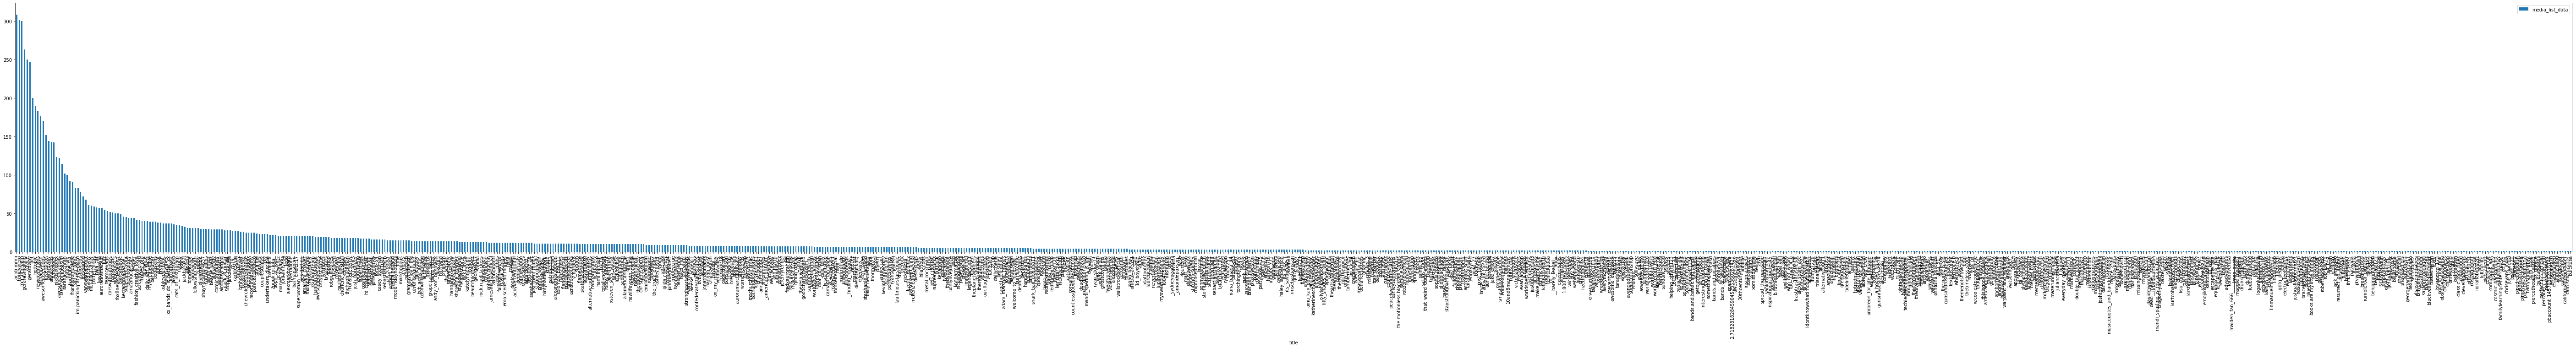

In [30]:
likesList.groupby('title').count().sort_values('media_list_data', ascending = False).plot.bar(y='media_list_data', figsize=(100, 10))

This bar plot is very small and impossible to read. However, if we ignore the x axis labels, and look at the curve the bar plot creates, we can see that there are a lot of accounts I only like 1 or 2 posts from, while there are several accounts that I like a lot of posts from which creates the steep curve towards the very left of the graph.

<AxesSubplot:xlabel='Accounts'>

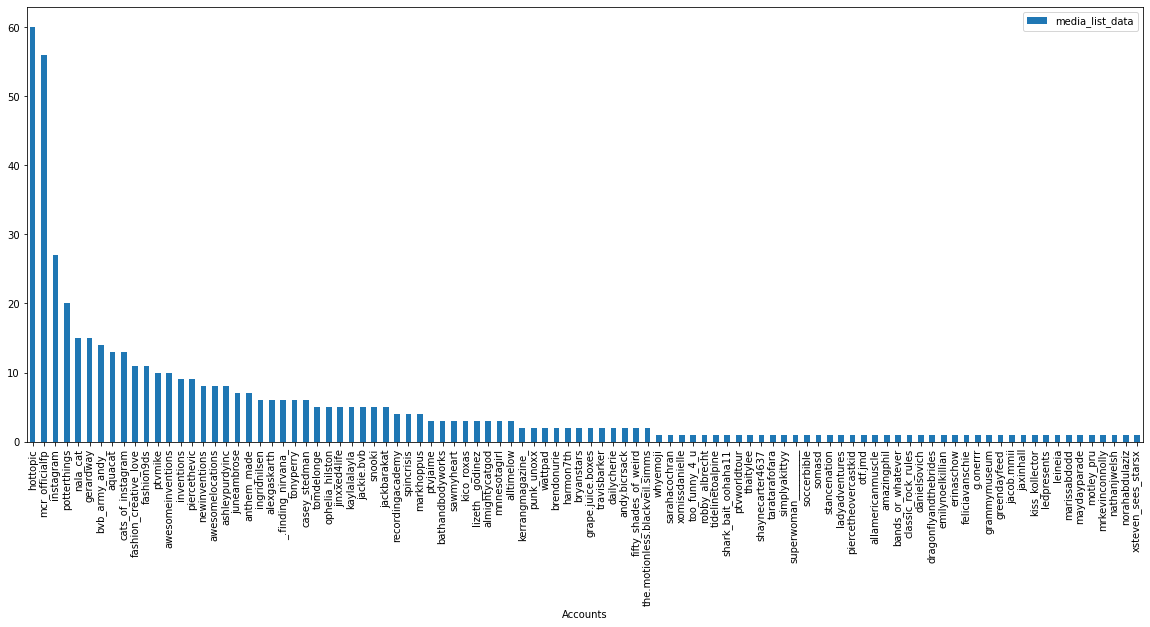

In [31]:
likesList[1:500].groupby('title').count().sort_values('media_list_data', ascending = False).plot.bar(y='media_list_data', xlabel='Accounts', figsize=(20, 8))

This bar plot is easier to read but only contains some of the data. As you can see here, I have liked the most posts from the account 'hottopic'.

### Task #5

Hypothesis:
Saved posts are from accounts that I have at least 100 likes in. 

- Theoretical hypothesis: Saved posts are from accounts that I have liked posts from.
- Statistical hypothesis: Saved posts are more likely to be from accounts with 100 or more likes.

Saving a post means bookmarking it to view later. When liking a post, there is somewhere to view all of your liked posts, but by saving a post it is more easily accessible than trying to scroll through all of the posts you've liked.

There is a data file called 'saved_posts.json' that would help to gather this data easily, when compared with which accounts I have liked the most posts from.

Data that could be collected that isn't already collected by Instagram that could help test this hypothesis could be data collected when someone posts something and if that is one of the accounts that I have more than 100 likes in, if I like it or if I save it. One could also collect data regarding when a post is made from an account that doesn't have more than 100 likes and see if time of day makes a difference on whether it is saved or liked, or neither.